In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score

In [5]:
df = pd.read_csv("creditcard.csv")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
name_colums_x = [name for name in df.columns if name != "Class"]
X = df[name_colums_x]
y = df["Class"].astype(int)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=42
)

              precision    recall  f1-score   support

           0      1.000     0.970     0.984     56864
           1      0.047     0.878     0.090        98

    accuracy                          0.969     56962
   macro avg      0.524     0.924     0.537     56962
weighted avg      0.998     0.969     0.983     56962



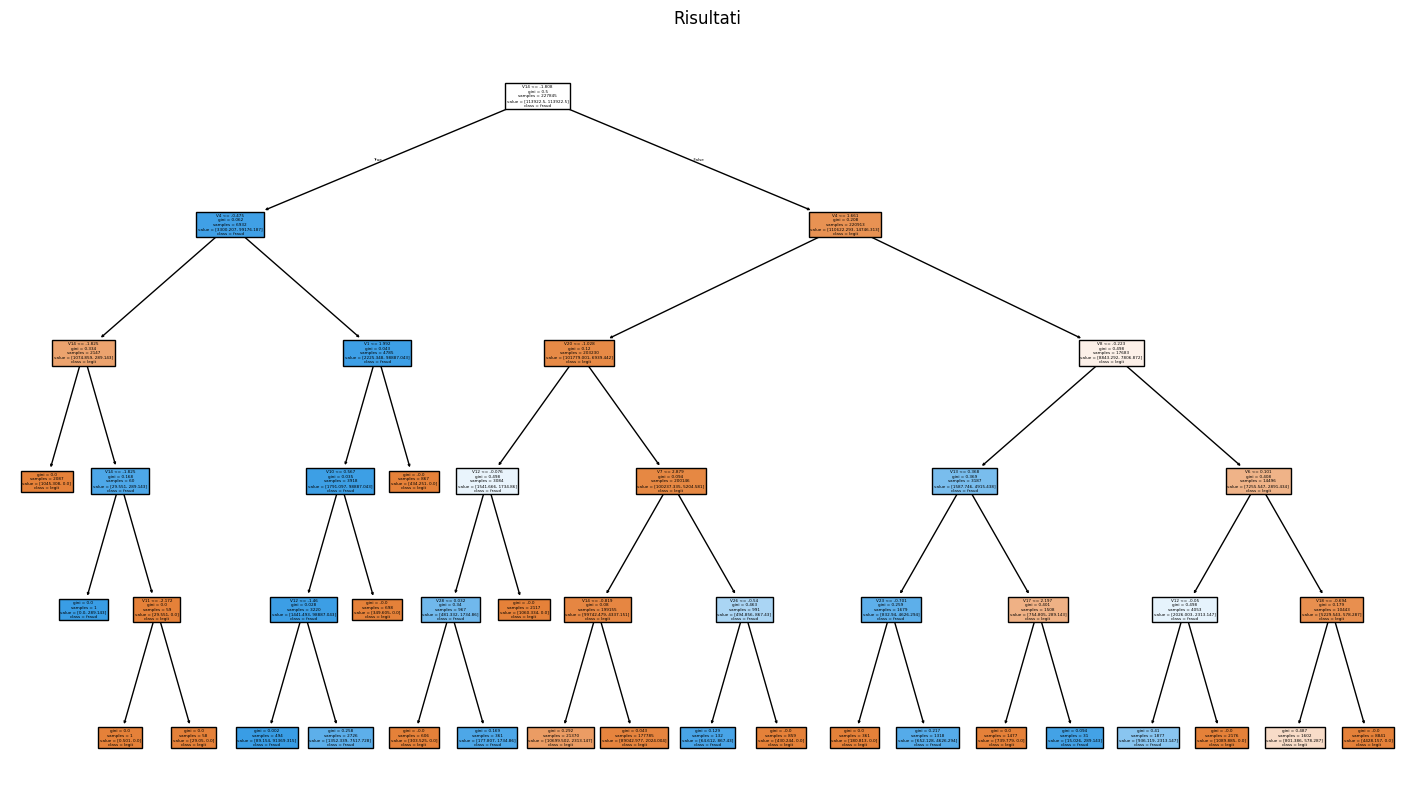

In [29]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced')
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree, digits=3))
plt.figure(figsize=(18, 10))
plot_tree(tree, feature_names=X.columns, class_names=["legit", "fraud"], filled=True)
plt.title("Risultati")
plt.show()

In [28]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42, class_weight='balanced')

rfc.fit(X_train, y_train)
y_pred_tree = rfc.predict(X_test)

print(classification_report(y_test, y_pred_tree, digits=3))


              precision    recall  f1-score   support

           0      1.000     0.996     0.998     56864
           1      0.291     0.888     0.438        98

    accuracy                          0.996     56962
   macro avg      0.645     0.942     0.718     56962
weighted avg      0.999     0.996     0.997     56962



In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

              precision    recall  f1-score   support

           0      1.000     0.983     0.991     56864
           1      0.085     0.908     0.155        98

    accuracy                          0.983     56962
   macro avg      0.542     0.946     0.573     56962
weighted avg      0.998     0.983     0.990     56962



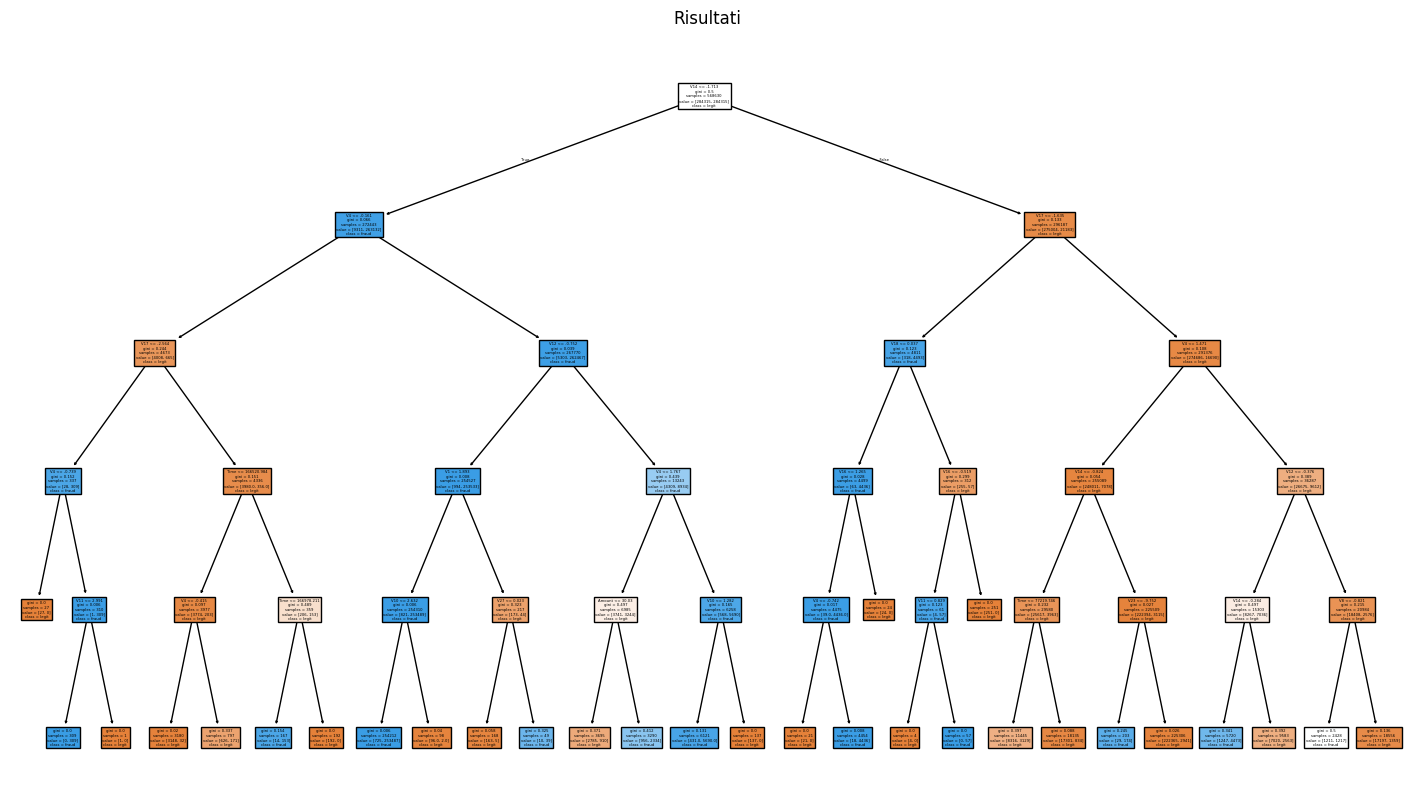

In [30]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_resampled, y_resampled)
y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree, digits=3))
plt.figure(figsize=(18, 10))
plot_tree(tree, feature_names=X.columns, class_names=["legit", "fraud"], filled=True)
plt.title("Risultati")
plt.show()

In [26]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)

rfc.fit(X_resampled, y_resampled)
y_pred_tree = rfc.predict(X_test)

print(classification_report(y_test, y_pred_tree, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.994     0.997     56864
           1      0.195     0.888     0.319        98

    accuracy                          0.993     56962
   macro avg      0.597     0.941     0.658     56962
weighted avg      0.998     0.993     0.996     56962

